In [4]:
import pandas as pd

df = pd.read_csv('/d3_aire01_49_1.csv', encoding='latin-1')

df.head()


,Entidad_federativa,Municipio,Tipo_de_Fuente,SO_2,CO,NOx,COV,PM_010,PM_2_5,NH_3,Entidad
0,Aguascalientes,Aguascalientes,Fuentes fijas,546.316,94.308,209.404,2219.396,246.873,182.143,2.929,Aguascalientes
1,Aguascalientes,Aguascalientes,Fuentes de Ã¡rea,15.877,2396.298,333.306,12438.827,1567.037,483.104,13661.221,Aguascalientes
2,Aguascalientes,Aguascalientes,Fuentes mÃ³viles carreteros,308.001,48527.124,10486.580,5148.961,721.389,659.929,83.887,Aguascalientes
3,Aguascalientes,Aguascalientes,Fuentes mÃ³viles que no circulan por carretera,36.981,548.796,1042.305,96.899,66.318,63.940,0.226,Aguascalientes
4,Aguascalientes,Aguascalientes,Fuentes naturales,NaN,NaN,440.268,1663.833,NaN,NaN,NaN,Aguascalientes


In [7]:
# Verifica valores nulos
df.isnull().sum()

# Elimina o reemplaza valores nulos
df_clean = df.dropna(subset=['SO_2', 'CO', 'NOx'])  # Eliminar filas con datos importantes faltantes

# Opcional: cambiar nombres de columnas para facilidad
df_clean.columns = df_clean.columns.str.replace(' ', '_')
df_clean.columns = df_clean.columns.str.replace('á', 'a').str.replace('é', 'e').str.replace('í', 'i').str.replace('ó', 'o').str.replace('ú', 'u')


In [8]:
!pip install firebase-admin


In [10]:
import firebase_admin
from firebase_admin import credentials, firestore

# Cambia 'archivo.json' por el nombre de tu archivo subido
cred = credentials.Certificate("/calidad-aire-2025-firebase-adminsdk-fbsvc-82fbb94a6a.json")

firebase_admin.initialize_app(cred)

# Crear cliente de base de datos
db = firestore.client()


In [11]:
# Supongamos que ya limpiaste el DataFrame como 'df_clean'
data_list = df_clean.head(10).to_dict(orient='records')  # Puedes cambiar a más registros

# Subir a Firebase
for i, doc in enumerate(data_list):
    db.collection("emisiones").document(f"doc_{i}").set(doc)


/tmp/ipython-input-2748483632.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_clean, x='Tipo_de_Fuente', y='NOx', estimator=sum, ci=None)


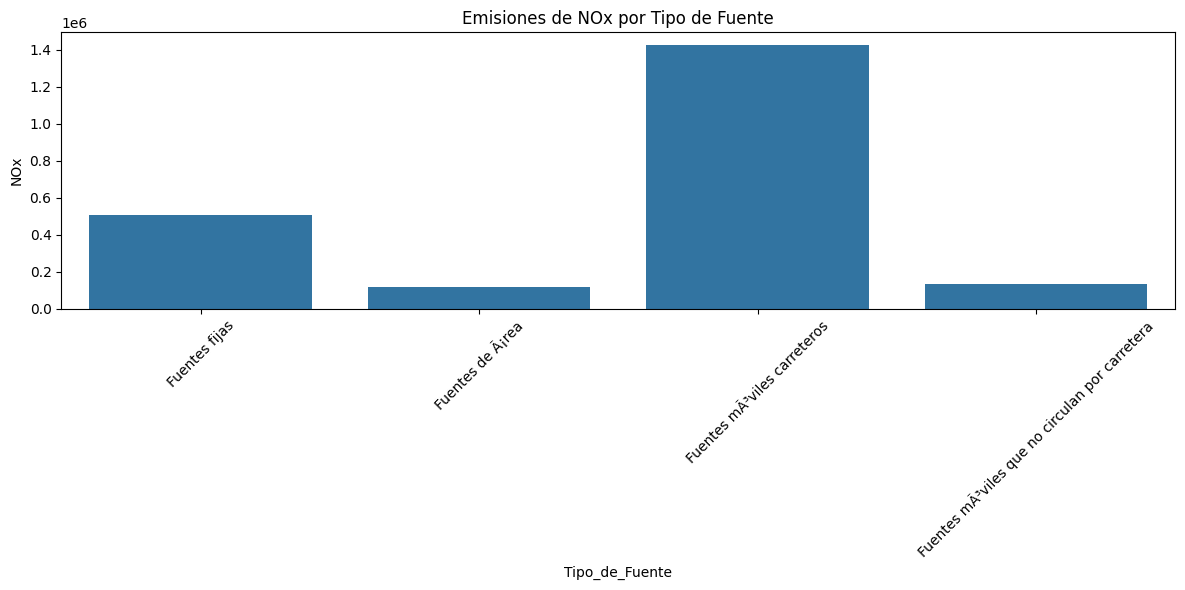

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='Tipo_de_Fuente', y='NOx', estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title("Emisiones de NOx por Tipo de Fuente")
plt.tight_layout()
plt.show()
